Prediction of CO2 emission using Multiple Linear Regression


Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.
In Multiple Linear Regression, the target variable(Y) is a linear combination of multiple predictor variables x1, x2, x3, ...,xn. 

Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (y-hat) over all samples in the dataset.

Main steps of deploying the MLR model:

Data Pre-processing Steps
Fitting the MLR model to the training set
Predicting the result of the test set


Step-1: Data Pre-processing Step:

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
##Loading Dataset

df = pd.read_csv('/home/soumia/datascience/FuelConsumption.csv')
df.head()
df.info
#df.columns

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

In [28]:
##Lets select features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [ ]:
Multiple Regression Model

In reality, there are multiple variables that predict the Co2emission. 
When more than one independent variable is present, the process is called multiple linear regression. 
For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 

In [40]:
#Extracting Independent and dependent Variable  
x= cdf.iloc[:, :-1].values  
y= cdf.iloc[:, -1].values  
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

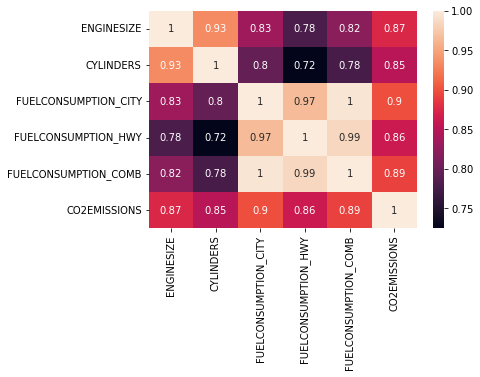

In [30]:
#check the correlation between dependent variables and independent variables
import seaborn as sns
sns.heatmap(cdf.corr(),annot=True)

In [31]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

Step: 2- Fitting our MLR model to the Training set:


In [32]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

Step: 3- Prediction of Test set results:


In [33]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test)
#Predicting the Training set result; 
x_pred= regressor.predict(x_train)  

In [34]:
#finding regression coefficients
print('Coefficients: ', regressor.coef_)
print(regressor.intercept_)

Coefficients:  [ 10.8547316    7.65914224 -11.21595269 -10.47231908  31.14100197]
64.88135054065862


Step 6:Evaluating performance

In [35]:
print('Residual sum squares: %.2f' % np.mean((y_pred - y_test) **2 ))

Residual sum squares: 617.32


In [36]:
print(regressor.score(x_test, y_test))

0.8426468641660052


<AxesSubplot:>

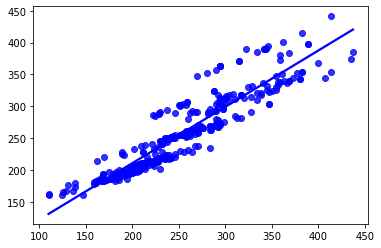

In [37]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

/home/soumia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/soumia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

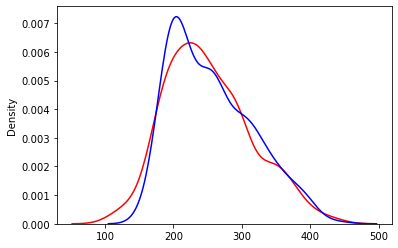

In [38]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [39]:
#Extracting Independent and dependent Variable  
x= cdf.iloc[:, :3].values  
y= cdf.iloc[:, -1].values  
print(x)
print(y)

[[ 2.   4.   9.9]
 [ 2.4  4.  11.2]
 [ 1.5  4.   6. ]
 ...
 [ 3.   6.  13.4]
 [ 3.2  6.  12.9]
 [ 3.2  6.  14.9]]
[196 221 136 ... 271 260 294]


In [22]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [23]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [24]:
y_pred= regressor.predict(x_test)

In [25]:
print(regressor.score(x_test, y_test))

0.8418565610806696
